In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = 'C:\\Users\\Rubio\\AppData\\Roaming\\SPB_16.6'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_train.shape

(307511, 122)

In [4]:
# 秀出資料欄位的類型, 與對應的數量
# df.dtypes : 轉成以欄位為 index, 類別(type)為 value 的 DataFrame
# .reset_index() : 預設是將原本的 index 轉成一個新的欄位, 如果不須保留 index, 則通常會寫成 .reset_index(drop=True)
app_train_df = app_train.dtypes.reset_index() 
app_train_df.columns = ["Count", "Column Type"]
app_train_df = app_train_df.groupby("Column Type").aggregate('count').reset_index()
app_train_df

,Column Type,Count
0,int64,41
1,float64,65
2,object,16


In [5]:
# 確定只有 int64, float64, object 三種類型後對欄位名稱執行迴圈, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
# .dtypes(欄位類型), .columns(欄位名稱) 是 DataFrame 提供的兩個方法, 這裡順便展示一下 for 與 zip 搭配的用法
for dtype, feature in zip(app_train.dtypes,app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
# 這邊採用的寫法稱為 f-string, 是 Python 3.6.2 以後版本才出現的
# 如果無法執行, 則需要更新到這個版本之後, 或自行將程式改寫為 str.format 形式
# 改寫方式可以參考 https://blog.louie.lu/2017/08/08/outdate-python-string-format-and-fstring/
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

41 Integer Features : ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

65 Float Features : ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OW

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# 觀察標籤
labels = app_train['NAME_CONTRACT_TYPE'].values
humans = app_train['CODE_GENDER'].values
print(labels)
print(humans)

['Cash loans' 'Cash loans' 'Revolving loans' ... 'Cash loans' 'Cash loans'
 'Cash loans']
['M' 'F' 'M' ... 'F' 'F' 'F']


In [8]:
# 刪除重複元素
l1 = []  
[l1.append(i) for i in app_train['NAME_CONTRACT_TYPE'] if not i in l1] 
print(l1) 

l2 = []  
[l2.append(i) for i in app_train['CODE_GENDER'] if not i in l2] 
print(l2) 

['Cash loans', 'Revolving loans']
['M', 'F', 'XNA']


In [9]:
# 輸出成直方圖
l3 = [[0,0,0],[0,0,0]]
for i in range(0,len(labels)):
    if labels[i] == 'Cash loans':
        if humans[i] == 'M':
            l3[0][0] = l3[0][0] + 1
        elif humans[i] == 'F':
            l3[0][1] = l3[0][1] + 1
        else:
            l3[0][2] = l3[0][2] + 1
    else:
        if humans[i] == 'M':
            l3[1][0] = l3[1][0] + 1
        elif humans[i] == 'F':
            l3[1][1] = l3[1][1] + 1
        else:
            l3[1][2] = l3[1][2] + 1
            
print(l3)

[[95432, 182800, 0], [9627, 19648, 4]]


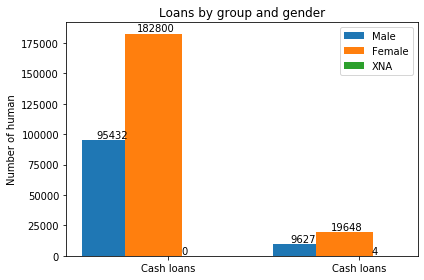

In [10]:
x = np.arange(len(l1))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, [l3[0][0],l3[1][0]], width, label='Male')
rects2 = ax.bar(x - width/4, [l3[0][1],l3[1][1]], width, label='Female')
rects3 = ax.bar(x + width/4, [l3[0][2],l3[1][2]], width, label='XNA') 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of human')
ax.set_title('Loans by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(2, 0),  # 3 points vertical offset, 數字偏移
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [11]:
app_train['AMT_INCOME_TOTAL'].mean()

168797.9192969845

In [116]:
#standard deviation: 標準偏差
app_train['AMT_INCOME_TOTAL'].std()

237123.14627883647

Text(0.5, 0, 'TARGET')

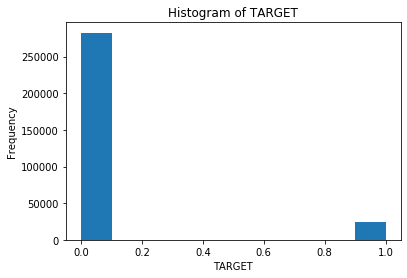

In [23]:
# hist 只能使用數字(DATA 型態)
fig,axes = plt.subplots()
app_train['TARGET'].plot.hist(bins=10,ax=axes)
axes.set_title('Histogram of TARGET')  #設定直方圖的標題
axes.set_xlabel('TARGET')              # 設定直方圖橫座標軸的標籤